In [5]:
import pandas as pd
import pymysql
import mysql.connector
import sqlalchemy
from matplotlib import pyplot as plt
import getpass

### Conectando ao BD

In [9]:
password = getpass.getpass()

database = 'notes_app'
user = 'root'
host='localhost'

con = pymysql.connect(host=host, user=user, passwd=password, db=database, charset='utf8mb4')
cur = con.cursor()
cur.execute('SELECT * FROM disciplina')
con.autocommit(True)

In [ ]:
disciplina = pd.read_sql("SELECT * FROM disciplina", con)
nota = pd.read_sql("SELECT * FROM nota", con)


### Aqui eu junto as duas tabelas em uma, para futuramente fazer a análise.

In [ ]:
df = pd.merge(nota, disciplina, left_on='disciplina', right_on='id_disciplina', how='left').drop(['id_disciplina', 'disciplina'], axis=1)

df

,id_nota,titulo,texto,ultima_modificacao,data_criacao,numero_edicoes,nome,periodo
0,1,Matemática,"A matemática (dos termos gregos μάθημα, transl...",2020-07-24 16:44:49,2021-06-16 08:46:10,13,Algebra Linear,1
1,2,Equação linear,Diz-se em matemática que uma equação polinomia...,2019-02-05 03:07:41,2020-03-13 08:14:38,10,Algebra Linear,1
2,3,Equação algébrica,"Em matemática, equações algébricas são equaçõe...",2021-02-05 11:27:51,2021-08-13 04:38:18,6,Algebra Linear,1
3,4,Equação diferencial,"Em matemática, uma equação diferencial é uma e...",2020-08-24 06:47:59,2021-04-16 20:57:31,21,Algebra Linear,1
4,5,Vetor (matemática),"Em geometria analítica, um vetor é uma classe ...",2020-12-13 14:35:00,2021-05-01 15:50:43,20,Algebra Linear,1
...,...,...,...,...,...,...,...,...
204,205,Roraima,Coordenadas: 2° 03' N 61° 24' O Roraima (pronú...,2020-07-24 00:35:20,2020-07-30 02:56:32,20,Língua castelhana,8
205,206,Estados Unidos,Estados Unidos da América (EUA; em inglês: Uni...,2019-05-05 14:19:07,2021-01-06 08:32:35,21,Língua castelhana,8
206,207,Belize,"Coordenadas: 17° 15' N, 88° 45' W Belize (pron...",2021-04-16 16:38:18,2021-11-04 06:06:13,13,Língua castelhana,8
207,208,Gibraltar,Coordenadas: 36° 7' N 5° 21' O Gibraltar (pron...,2020-02-27 11:03:51,2021-02-09 20:32:08,17,Língua castelhana,8


## Questão: Qual matéria teve a maior quantidade de anotações? E qual obteve a menor quantidade?

### Nessa análise, procurarei buscar a quantidade de anotações que cada matéria obteve, a fim de compreender a necessidade de anotações em cada uma delas. É uma razão interessante, pois alguns conteúdos normalmente precisam de mais anotações devido ao volume de informações que possuem, o que implica em mais anotações de alunos. Já em outros, isso acontece de forma menor pois podem ter um conteúdo mais compacto ou mais simples de memorizar.

In [ ]:
qntd_materias = df.nome.value_counts()
al = qntd_materias['Algebra Linear']
bio = qntd_materias['Biologia']
geo = qntd_materias['Geografia']
ing = qntd_materias['Língua Inglesa']
filo = qntd_materias['Filosofia']
quim = qntd_materias['Química']
cast = qntd_materias['Língua castelhana']

print('A quantidade de anotações na matéria de Algebra Linear é ', al)
print('A quantidade de anotações na matéria de Biologia é ', bio)
print('A quantidade de anotações na matéria de Geografia é ', geo)
print('A quantidade de anotações na matéria de Lingua Inglesa é ', ing)
print('A quantidade de anotações na matéria de Filosofia é ', filo)
print('A quantidade de anotações na matéria de Química é ', quim)
print('A quantidade de anotações na matéria de Lingua Castelhana é ', cast)

A quantidade de anotações na matéria de Algebra Linear é  22
A quantidade de anotações na matéria de Biologia é  35
A quantidade de anotações na matéria de Geografia é  14
A quantidade de anotações na matéria de Lingua Inglesa é  34
A quantidade de anotações na matéria de Filosofia é  36
A quantidade de anotações na matéria de Química é  26
A quantidade de anotações na matéria de Lingua Castelhana é  42


<BarContainer object of 7 artists>

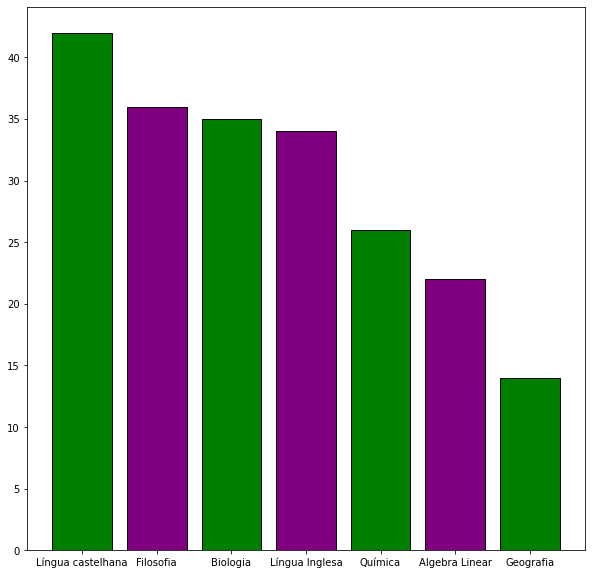

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)

plt.bar(x=qntd_materias.index.values, height=qntd_materias.values,
        color=['green', 'purple'], edgecolor='black')

## Foi possível notar que Lingua Castelhana possuiu mais anotações, enquanto Geografia obteve menos. Além da análise mostrando quantas anotações cada matéria teve, gerei também um gráfico que as coloca em ordem, para fins de melhor compreensão e ranqueamento delas.